# Purpose
The purpose of this test is to verify that the WigSample algorithm is working correctly. This will be verified with distribution analysis, including chi-squared goodness of fit on the level-spacing distribution. The log-probability of sampling such a distribution should form a Gaussian-like distribution about the expected log-likelihood.

...

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=20, linewidth=130)

In [2]:
%matplotlib widget

# Bayes Sampler Test

#### Defining Mean Parameters

In [3]:
# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron

# Mean Parameters:
EB = (1e-5,1000)
false_dens = 1/10
lvl_dens  = [1/10, 1/10]
# gn2m  = [44.11355, 33.38697]
gn2m  = [400, 400]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, false_dens=false_dens)

#### Sample Resonances

In [4]:
Res, Types, Missed_Res, Missed_Types = reaction.sample()

#### Running WigSample

In [5]:
num_trials = 200 # number of samples
Prior, TPPrior = TAZ.PTBayes(Res, reaction)
distributions = reaction.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, reaction.EB, distributions, reaction.false_dens, Prior, TPPrior)
Samples = runMaster.WigSample(num_trials)

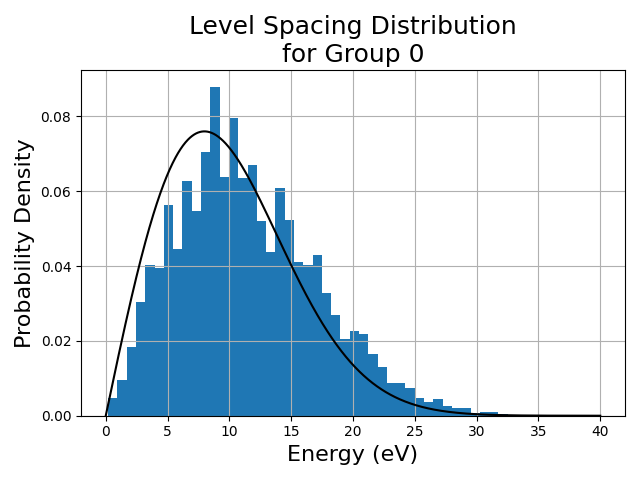

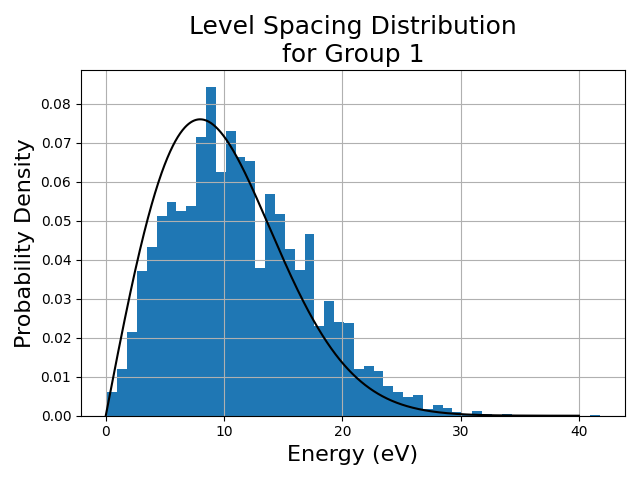

In [6]:
for g in range(2):
    lvl_spacing = np.zeros((0,))
    for trial in range(num_trials):
        E = Res.E[Samples[:,trial] == g]
        lvl_spacing = np.concatenate((lvl_spacing, np.diff(E)))
    lvl_spacing = np.sort(lvl_spacing)

    xMax = 4 / reaction.lvl_dens_all[g]
    L_fit = 1000
    X = np.linspace(0.0, xMax, L_fit)
    PDF = reaction.fit('level spacing', g)(X)

    plt.figure(g)
    plt.clf()
    plt.hist(lvl_spacing, 50, density=True)
    plt.plot(X, PDF, '-k')
    plt.grid()
    plt.title(f'Level Spacing Distribution\nfor Group {g}', fontsize=18)
    plt.xlabel('Energy (eV)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.tight_layout()
    plt.show()

In [7]:
print(np.array([np.bincount(Samples[:,tr], minlength=3) for tr in range(Samples.shape[1])]))

[[ 86  95 121]
 [ 85  88 129]
 [ 92  89 121]
 [ 82  84 136]
 [ 89  82 131]
 [ 85  91 126]
 [ 85  94 123]
 [ 93  82 127]
 [ 83  92 127]
 [ 92  92 118]
 [ 81  91 130]
 [ 84  81 137]
 [ 98  85 119]
 [ 87  91 124]
 [ 93  91 118]
 [ 87  80 135]
 [ 90  86 126]
 [ 91  81 130]
 [ 80  92 130]
 [ 79  87 136]
 [ 95  90 117]
 [ 82  80 140]
 [ 82  87 133]
 [ 86  81 135]
 [ 86  85 131]
 [ 89  78 135]
 [ 91  81 130]
 [ 85  96 121]
 [ 85  81 136]
 [ 85  84 133]
 [ 92  85 125]
 [ 97  87 118]
 [ 86  88 128]
 [ 78  93 131]
 [ 86  86 130]
 [ 94  81 127]
 [ 88  81 133]
 [ 86  89 127]
 [ 86  82 134]
 [ 93  87 122]
 [ 81  87 134]
 [ 95  88 119]
 [ 88  89 125]
 [ 83  87 132]
 [ 88  94 120]
 [ 79  88 135]
 [ 92  84 126]
 [ 92  88 122]
 [ 94  77 131]
 [ 85  91 126]
 [ 77  93 132]
 [ 89  86 127]
 [ 81  91 130]
 [ 88  83 131]
 [ 87  83 132]
 [ 88  93 121]
 [ 88  83 131]
 [ 79  80 143]
 [ 84  94 124]
 [ 89  79 134]
 [ 78  92 132]
 [ 84  77 141]
 [ 78  97 127]
 [ 84  86 132]
 [ 86  80 136]
 [ 86  88 128]
 [ 87  85 

# Log Likelihood Test

...